In [1]:
from main import *

## Two - Tetra  $\mu_r = 32$ 

CSG_TwoTetra/al_0.001_mu_32_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/
Opening files from this path =  CSG_TwoTetra/al_0.001_mu_32_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/


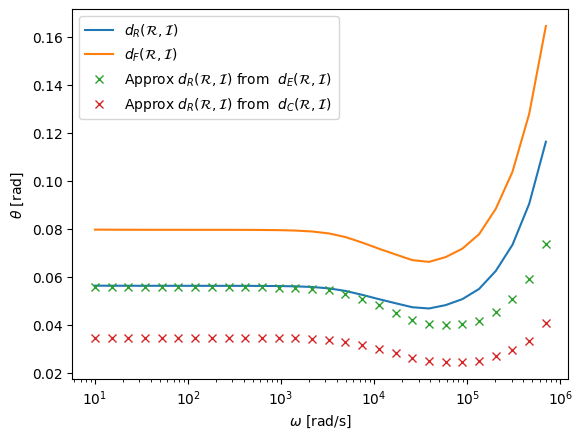

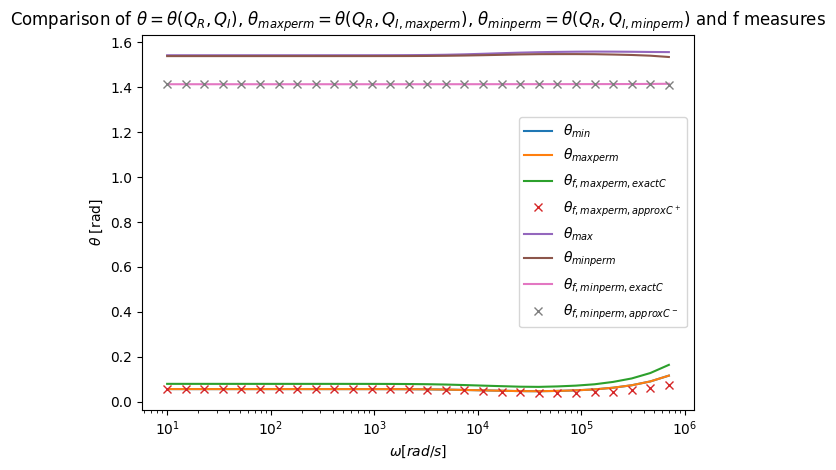

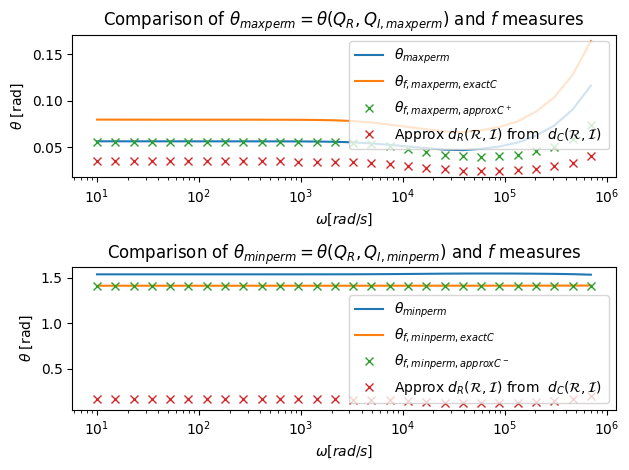

Computing F measure Tilde


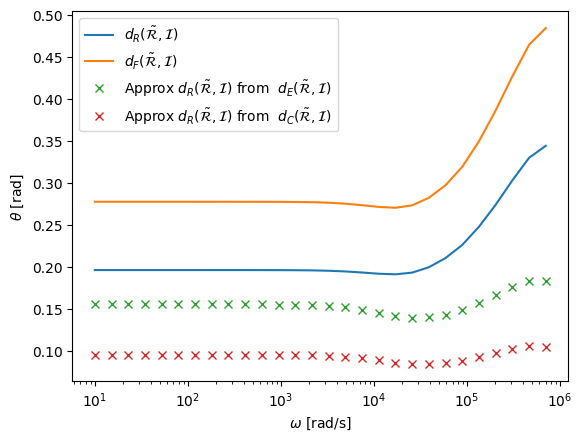

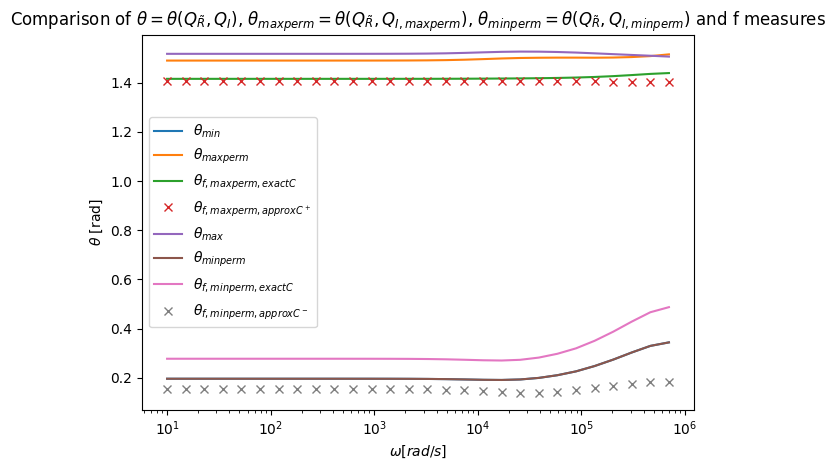

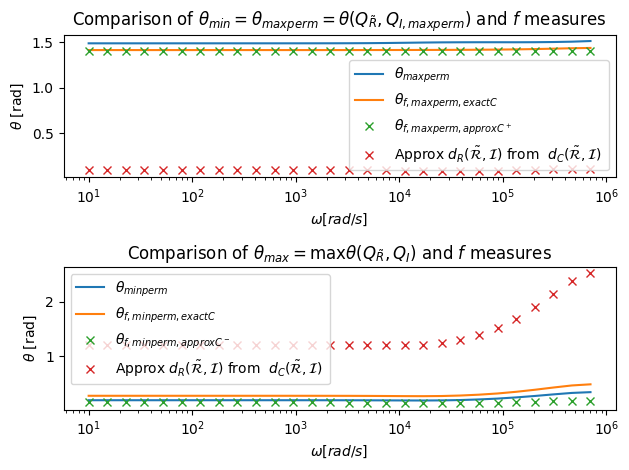

In [2]:
DirList=["CSG_TwoTetra/al_0.001_mu_32_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/"]
SaveRIList=[]
SaveRtilde=[]

MaxOmega=1e6
for directory in DirList:
    print(directory)
    RIResults,RtildeIResults=main(directory,MaxOmega, Figures="On")

dict_keys(['Frequencies', 'MinAnglestoreRI', 'AnglestoreRIfmeasapprxconstsortedmaxdiff_max', 'AnglestoreRIfmeasapprxconstsortedmindiff_min', 'AnglestoreRIfmeasapprxconstsortedmaxdiff_min', 'AnglestoreRIfmeasapprxconstsortedmindiff_max', 'dFMinAnglestoreRI', 'dFMaxAnglestoreRI', 'AnglestoreRIcommeasapprxconstsortedmaxdiff_max', 'AnglestoreRIcommeasapprxconstsortedmindiff_min', 'AnglestoreRIcommeasapprxconstsortedmaxdiff_min', 'AnglestoreRIcommeasapprxconstsortedmindiff_max'])


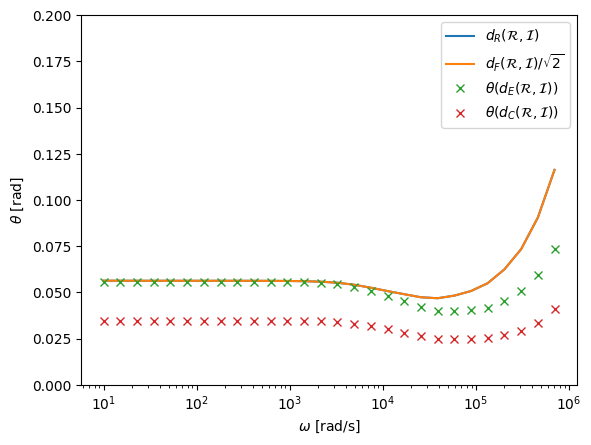

In [5]:
print(RIResults.keys())

Frequencies=RIResults["Frequencies"]
MinAnglestoreRI=RIResults["MinAnglestoreRI"]
AnglestoreRIfmeasapprxconstsortedmaxdiff_max=np.fmin(RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_min"])
AnglestoreRIcommeasapprxconstsortedmaxdiff_max=np.fmin(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])

dFMinAnglestoreRI = RIResults["dFMinAnglestoreRI"]
fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreRI,label=r'$d_R({\cal R},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreRI/np.sqrt(2),label=r'$d_F({\cal R},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreRIfmeasapprxconstsortedmaxdiff_max,'x',label=r'$\theta(d_E({\cal R},{\cal I}))$ ')
plt.semilogx(Frequencies,AnglestoreRIcommeasapprxconstsortedmaxdiff_max,'x',label=r'$\theta(d_C({\cal R},{\cal I}))$ ')

plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.ylim(0,0.2)
plt.legend()
#plt.savefig("CSG_TwoTetra_dRanddE_metrics_al_0.001_mu_32_sig_1e7_ord3.pdf")
plt.show()

dict_keys(['Frequencies', 'MinAnglestoreRI', 'AnglestoreRIfmeasapprxconstsortedmaxdiff_max', 'AnglestoreRIfmeasapprxconstsortedmindiff_min', 'AnglestoreRIfmeasapprxconstsortedmaxdiff_min', 'AnglestoreRIfmeasapprxconstsortedmindiff_max', 'dFMinAnglestoreRI', 'dFMaxAnglestoreRI', 'AnglestoreRIcommeasapprxconstsortedmaxdiff_max', 'AnglestoreRIcommeasapprxconstsortedmindiff_min', 'AnglestoreRIcommeasapprxconstsortedmaxdiff_min', 'AnglestoreRIcommeasapprxconstsortedmindiff_max'])


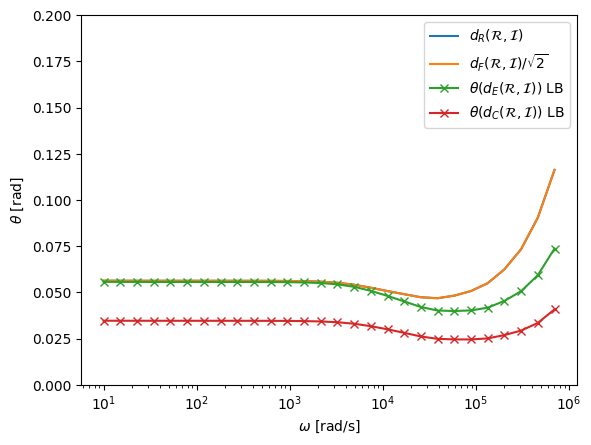

In [10]:

print(RIResults.keys())

Frequencies=RIResults["Frequencies"]
MinAnglestoreRI=RIResults["MinAnglestoreRI"]
AnglestoreRIfmeasapprxconstsortedmaxdiff_max=np.fmin(RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_min"])
AnglestoreRIcommeasapprxconstsortedmaxdiff_max=np.fmin(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])

AnglestoreRIfmeasupper=np.fmax(RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_min"])
AnglestoreRIfmeaslower=np.fmin(RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_min"])

AnglestoreRIfmeasupper=np.fmax(AnglestoreRIfmeasupper,RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_min"])
AnglestoreRIfmeaslower=np.fmin(AnglestoreRIfmeaslower,RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_min"])
AnglestoreRIfmeasavg=(AnglestoreRIfmeasupper+AnglestoreRIfmeaslower)/2

AnglestoreRIcommmupper=np.fmax(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_min"])
AnglestoreRIcommmlower=np.fmin(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_min"])
AnglestoreRIcommmavg = (AnglestoreRIcommmupper+AnglestoreRIcommmlower )/2

AnglestoreRIcommmupper=np.fmax(AnglestoreRIcommmupper,RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])
AnglestoreRIcommmlower=np.fmin(AnglestoreRIcommmlower,RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])
AnglestoreRIcommmavg = (AnglestoreRIcommmupper+AnglestoreRIcommmlower )/2



dFMinAnglestoreRI = RIResults["dFMinAnglestoreRI"]
fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreRI,label=r'$d_R({\cal R},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreRI/np.sqrt(2),label=r'$d_F({\cal R},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreRIfmeaslower,'-x',label=r'$\theta(d_E({\cal R},{\cal I}))$ LB')

plt.semilogx(Frequencies,AnglestoreRIcommmlower,'-x',label=r'$\theta(d_C({\cal R},{\cal I}))$ LB')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.ylim(0,0.2)
plt.legend()
plt.savefig("CSG_TwoTetra_dRanddE_metrics_al_0.001_mu_32_sig_1e7_ord3.pdf")
plt.show()


dict_keys(['Frequencies', 'MinAnglestoreRtildeI', 'AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max', 'AnglestoreRtildeIfmeasapprxconstsortedmindiff_min', 'AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_min', 'AnglestoreRtildeIfmeasapprxconstsortedmindiff_max', 'AnglestoreRtildeIfmeasfullconstsortedmindiff', 'AnglestoreRtildeIfmeasfullconstsortedmaxdiff', 'dFMinAnglestoreRtildeI', 'dFMaxAnglestoreRtildeI', 'AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max', 'AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_min', 'AnglestoreRtildeIcommeasapprxconstsortedmindiff_min', 'AnglestoreRtildeIcommeasapprxconstsortedmindiff_max'])


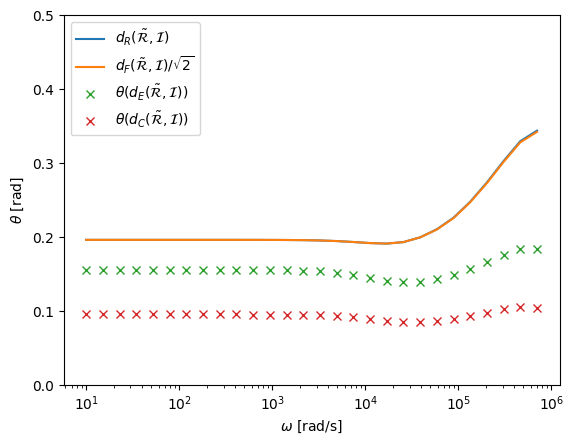

In [7]:
print(RtildeIResults.keys())

Frequencies=RtildeIResults["Frequencies"]
MinAnglestoreRtildeI=RtildeIResults["MinAnglestoreRtildeI"]
AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max=np.fmin(RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_min"])
AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max=np.fmin(RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_min"])

dFMinAnglestoreRtildeI = RtildeIResults["dFMinAnglestoreRtildeI"]
fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreRtildeI,label=r'$d_R(\tilde{\cal R},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreRtildeI/np.sqrt(2),label=r'$d_F(\tilde{\cal R},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max,'x',label=r'$\theta(d_E(\tilde{\cal R},{\cal I}))$ ')
plt.semilogx(Frequencies,AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max,'x',label=r'$\theta(d_C(\tilde{\cal R},{\cal I}))$ ')

plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.ylim(0,0.5)
plt.legend()
#plt.savefig("CSG_TwoTetra_dRanddE_metrics_tilde_al_0.001_mu_32_sig_1e7_ord3.pdf")
plt.show()

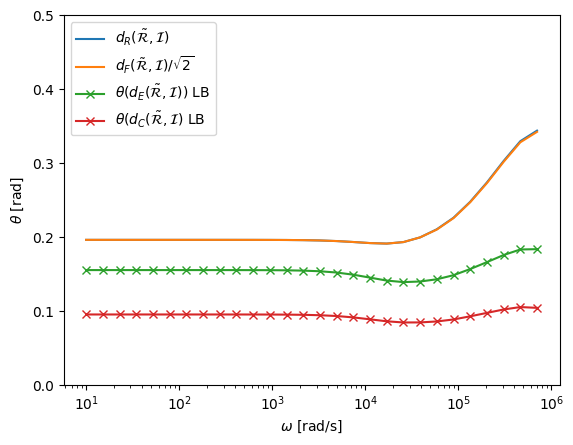

In [11]:

Frequencies=RtildeIResults["Frequencies"]
MinAnglestoreRtildeI=RtildeIResults["MinAnglestoreRtildeI"]
#AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max=RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max"]
dFMinAnglestoreRtildeI = RtildeIResults["dFMinAnglestoreRtildeI"]
#AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max=np.fmin(RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_min"])
AnglestoreRtildeIfmeasupper=np.fmax(RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_min"])
AnglestoreRtildeIfmeaslower=np.fmin(RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_min"])

AnglestoreRtildeIfmeasupper=np.fmax(AnglestoreRtildeIfmeasupper,RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_min"])
AnglestoreRtildeIfmeaslower=np.fmin(AnglestoreRtildeIfmeaslower,RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_min"])

AnglestoreRtildeIfmeasavg=(AnglestoreRtildeIfmeasupper+AnglestoreRtildeIfmeaslower)/2

AnglestoreRtildeIfmeasfullconstsortedmindiff= RtildeIResults["AnglestoreRtildeIfmeasfullconstsortedmindiff"]

AnglestoreRtildeIcommmupper=np.fmax(RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_min"])
AnglestoreRtildeIcommmlower=np.fmin(RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_min"])

AnglestoreRtildeIcommmupper=np.fmax(AnglestoreRtildeIcommmupper,RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_min"])
AnglestoreRtildeIcommmlower=np.fmin(AnglestoreRtildeIcommmlower,RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_min"])


AnglestoreRtildeIcommmavg = (AnglestoreRtildeIcommmupper+AnglestoreRtildeIcommmlower )/2

AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max=np.fmin(RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_min"])

fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreRtildeI,label=r'$d_R(\tilde{\cal R},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreRtildeI/np.sqrt(2),label=r'$d_F(\tilde{\cal R},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreRtildeIfmeaslower,'-x',label=r'$\theta(d_E(\tilde{\cal R},{\cal I}))$ LB')
plt.semilogx(Frequencies,AnglestoreRtildeIcommmlower,'-x',label=r'$\theta(d_C(\tilde{\cal R},{\cal I})$ LB ')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.ylim(0,0.5)
plt.legend()
plt.savefig("CSG_TwoTetra_dRanddE_metrics_tilde_al_0.001_mu_32_sig_1e7_ord3.pdf")
plt.show()

In [5]:
## Loop over different Permeabilities and compare results

DirList=["CSG_TwoTetra/al_0.001_mu_1_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/",
         "CSG_TwoTetra/al_0.001_mu_2_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/",
         "CSG_TwoTetra/al_0.001_mu_8_sig_1e7/1e1-1e8_40_el_25014_ord_3_POD_13_1e-7/Data/",
         "CSG_TwoTetra/al_0.001_mu_16_sig_1e7/1e1-1e8_40_el_25014_ord_3_POD_13_1e-7/Data/",
         "CSG_TwoTetra/al_0.001_mu_32_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/",
         "CSG_TwoTetra/al_0.001_mu_64_sig_1e7/1e1-1e8_40_el_25014_ord_3_POD_13_1e-7/Data/",
         "CSG_TwoTetra/al_0.001_mu_128_sig_1e7/1e1-1e8_40_el_25014_ord_3_POD_13_1e-7/Data/"]

murlist=[1,2,8,16,32,64,128]
Nresults=len(Frequencies)
Results=np.zeros((7,Nresults))
TildeResults=np.zeros((7,Nresults))
dRresults=np.zeros((7,Nresults))
dRTilderesults=np.zeros((7,Nresults))
dFresults=np.zeros((7,Nresults))
dFTilderesults=np.zeros((7,Nresults))
dCresults=np.zeros((7,Nresults))
dCTilderesults=np.zeros((7,Nresults))


In [6]:
MaxOmega=1e6
count=0
for directory in DirList:
    print(directory)
    RIResults,RtildeIResults=main(directory,MaxOmega,Figures="Off")
    AnglestoreRIfmeasapprxconstsortedmaxdiff_max=np.fmin(RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_min"])
    Results[count,:] =AnglestoreRIfmeasapprxconstsortedmaxdiff_max
    AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max=np.fmin(RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_min"])
    TildeResults[count,:] =AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max
    dRresults[count,:] = RIResults["MinAnglestoreRI"]
    dFresults[count,:] = RIResults["dFMinAnglestoreRI"]
    dRTilderesults[count,:] = RtildeIResults["MinAnglestoreRtildeI"]
    dFTilderesults[count,:] = RtildeIResults["dFMinAnglestoreRtildeI"]
    dCresults[count,:] = np.fmin(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])
    dCTilderesults[count,:] = np.fmin(RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_min"])

    
    count+=1
Frequencies=RtildeIResults["Frequencies"]


CSG_TwoTetra/al_0.001_mu_1_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/
Opening files from this path =  CSG_TwoTetra/al_0.001_mu_1_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/
CSG_TwoTetra/al_0.001_mu_2_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/
Opening files from this path =  CSG_TwoTetra/al_0.001_mu_2_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/
CSG_TwoTetra/al_0.001_mu_8_sig_1e7/1e1-1e8_40_el_25014_ord_3_POD_13_1e-7/Data/
Opening files from this path =  CSG_TwoTetra/al_0.001_mu_8_sig_1e7/1e1-1e8_40_el_25014_ord_3_POD_13_1e-7/Data/
CSG_TwoTetra/al_0.001_mu_16_sig_1e7/1e1-1e8_40_el_25014_ord_3_POD_13_1e-7/Data/
Opening files from this path =  CSG_TwoTetra/al_0.001_mu_16_sig_1e7/1e1-1e8_40_el_25014_ord_3_POD_13_1e-7/Data/
CSG_TwoTetra/al_0.001_mu_32_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/
Opening files from this path =  CSG_TwoTetra/al_0.001_mu_32_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/
CSG_TwoTetra/al_0.001_mu_64_sig_1e7/1e1-1e8_40

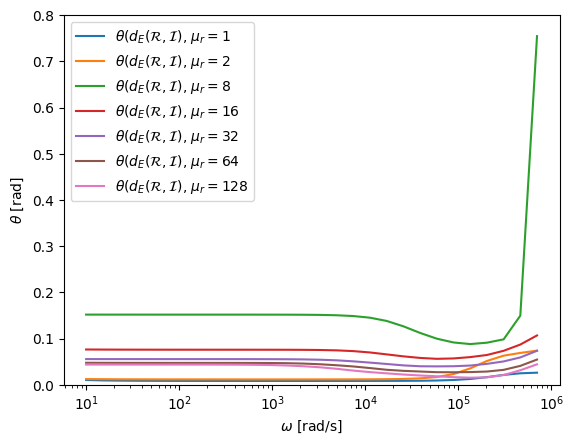

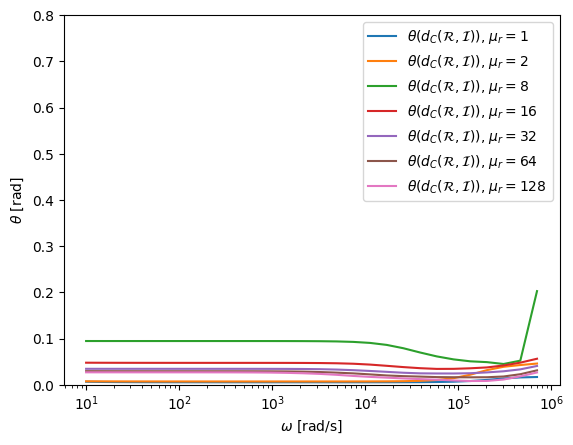

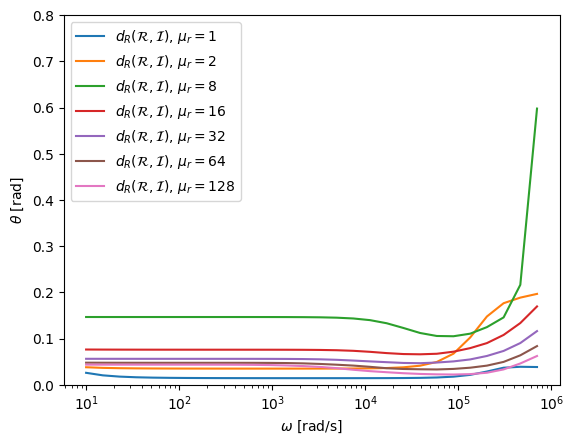

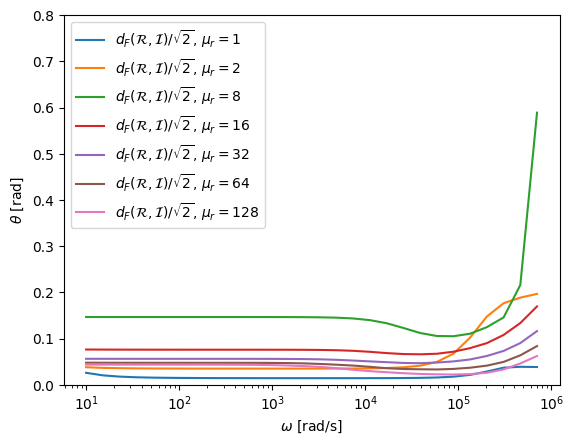

In [7]:
fig=plt.figure()
for count in range(7):
    plt.semilogx(Frequencies,Results[count,:],label=r'$\theta(d_E({\cal R},{\cal I})$ LB, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,0.8)
plt.savefig("CSG_TwoTetra_apprxdR_metrics_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()

fig=plt.figure()
for count in range(7):
    plt.semilogx(Frequencies,dCresults[count,:],label=r'$\theta(d_C({\cal R},{\cal I}))$ LB, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,0.8)
plt.savefig("CSG_TwoTetra_apprxdR_metricsdC_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()

fig=plt.figure()
for count in range(7):
    plt.semilogx(Frequencies,dRresults[count,:],label=r'$d_R({\cal R},{\cal I})$, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,0.8)
plt.savefig("CSG_TwoTetra_dR_metrics_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()


fig=plt.figure()
for count in range(7):
    plt.semilogx(Frequencies,dFresults[count,:]/np.sqrt(2),label=r'$d_F({\cal R},{\cal I})/\sqrt{2}$, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,0.8)
plt.savefig("CSG_TwoTetra_dF_metrics_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()



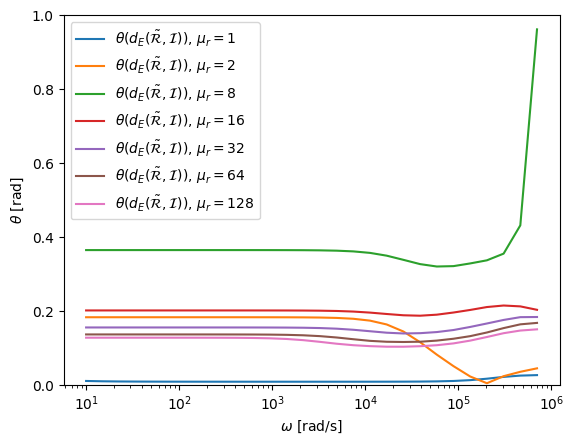

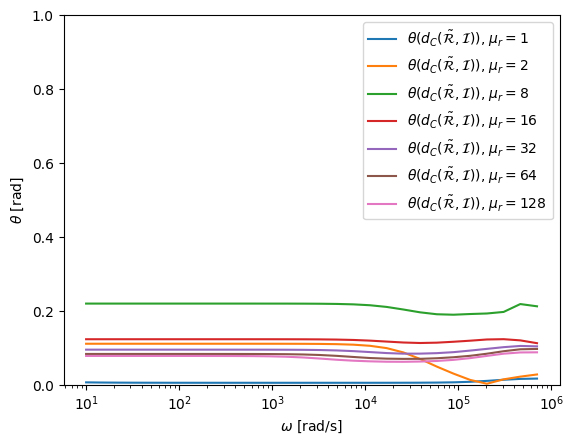

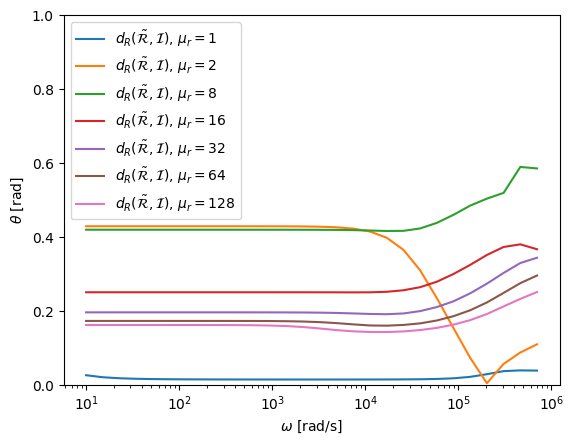

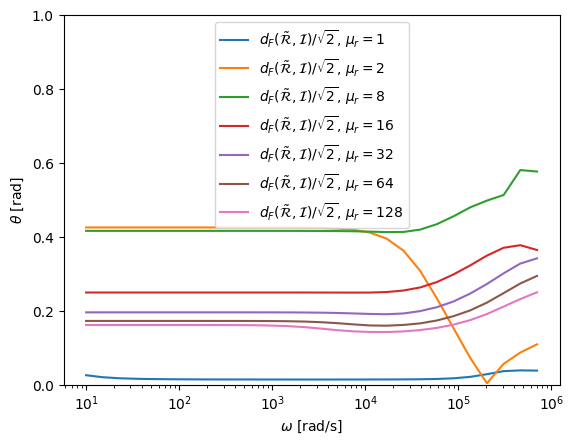

In [8]:
fig=plt.figure()
for count in range(7):
    plt.semilogx(Frequencies,TildeResults[count,:],label=r'$\theta(d_E(\tilde{\cal R},{\cal I}))$ LB, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,1.0)
plt.savefig("CSG_TwoTetra_apprxdR_metrics_tilde_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()

fig=plt.figure()
for count in range(7):
    plt.semilogx(Frequencies,dCTilderesults[count,:],label=r'$\theta(d_C(\tilde{\cal R},{\cal I}))$ LB, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,1.0)
plt.savefig("CSG_TwoTetra_apprxdR_metricsdC_tilde_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()


fig=plt.figure()
for count in range(7):
    plt.semilogx(Frequencies,dRTilderesults[count,:],label=r'$d_R(\tilde{\cal R},{\cal I})$, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,1.0)
plt.savefig("CSG_TwoTetra_dR_metrics_tilde_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()

fig=plt.figure()
for count in range(7):
    plt.semilogx(Frequencies,dFTilderesults[count,:]/np.sqrt(2),label=r'$d_F(\tilde{\cal R},{\cal I})/\sqrt{2}$, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,1.0)
plt.savefig("CSG_TwoTetra_dF_metrics_tilde_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()